In [71]:
# Analiza SEC

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.integrate import simps
import plotly
import plotly.graph_objs as go
%matplotlib inline


### wpisać: współcznniki kalibrcji
a = -1.087
b = 14.63

### wpisać: nazwę pliku z chromatogramem
plik = 'pia3kno3.dat'




chromatogram=np.loadtxt(plik)
x=chromatogram[:,0]
y=chromatogram[:,1]
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [go.Scatter(x=x, y=y)],
    "layout": go.Layout(title=plik,width=600,height=300)
})

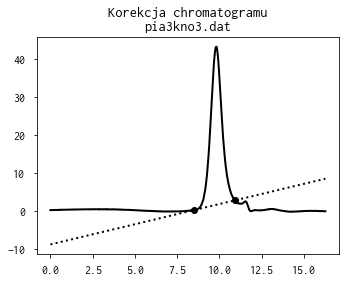

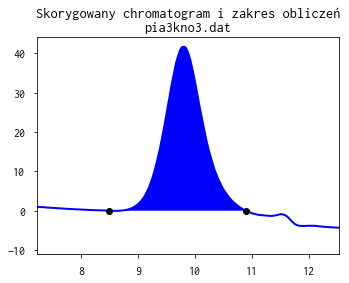

Wyniki obliczeń
Chromatogram: pia3kno3.dat
Mn=6283g/mol
Mw=12301g/mol
PDI=2.0


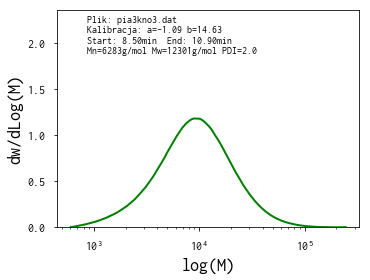

In [77]:
chromatogram=np.loadtxt(plik)
x=chromatogram[:,0]
y=chromatogram[:,1]

### wspisać
start_piku = 8.5
end_piku = 10.9
#--------------

x1 = start_piku
x2 = end_piku
y1 = np.interp(x1, x, y)
y2 = np.interp(x2, x, y)
a1,b1,r_value,p_value,std_err=stats.linregress((x1,x2),(y1,y2))

plt.plot(x,y,'k-')
plt.plot(x,a1*x+b1,'k:')
plt.plot(x1,y1,'ko')
plt.plot(x2,y2,'ko')
plt.title("Korekcja chromatogramu\n{}".format(plik))
plt.show()

plt.xlim(x1-0.15*x1,x2+0.15*x2)
plt.plot(x,y-(a1*x+b1),'-')
plt.plot(x1,y1-(a1*x1+b1),'ko')
plt.plot(x2,y2-(a1*x2+b1),'ko')
plt.fill_between(x,y-(a1*x+b1), where=(x > x1) & (x < x2))
plt.title("Skorygowany chromatogram i zakres obliczeń\n{}".format(plik))
plt.show()




t = np.linspace(x1,x2,1000)
s = np.interp(t, x, y-(a1*x+b1))
area = simps(s, t)

log10e = np.log10(np.e)
M = 10**(a*t+b)
logM = np.log10(M)

x = -(1/a)*(s/area)
w = -(log10e/(M*a))*(s/area)

Mn = -1/simps(w/M, M)
Mw = -simps(w*M, M)
PDI = Mw/Mn



fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('log(M)', fontsize=18)
ax.set_ylabel('dw/dLog(M)', fontsize=18)
ax.set_xscale('log')
ax.set_ylim(0,np.max(x)*2)
ax.text(0.1, 0.8, 
        "Plik: {}\nKalibracja: a={:.2f} b={:.2f}\nStart: {:.2f}min  End: {:.2f}min\nMn={:.0f}g/mol Mw={:.0f}g/mol PDI={:.1f}"
        .format(plik, a,b,x1,x2, Mn, Mw, PDI), transform=ax.transAxes)
ax.plot(M, x, 'g-')
fig.savefig(plik+".mwd.png", dpi=300)


print("Wyniki obliczeń\nChromatogram: {}".format(plik))
print("Mn={:.0f} g/mol".format(Mn))
print("Mw={:.0f} g/mol".format(Mw))
print("PDI={:.1f}".format(PDI))
print("W plikach {} jest wykres i dane do ".format(plik))


np.savetxt(plik+".mwd.dat", np.column_stack((M,x)))